In [1]:
import lmfit
import numpy as np
import copy
import matplotlib.pyplot as plt
from fitting_functions import tdep
from scipy.constants import c

from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

In [2]:
def exp(x):
    y = np.zeros_like(x)
    y[x>=0] = 1
    y[x<0] = np.exp(x[x<0])
    return y

from scipy.special import erf

def R(x, A, tau1, tau0, R0):
    return R0 + 0.5 *( 1 + erf(x/tau0))*A*exp(-x/tau1)



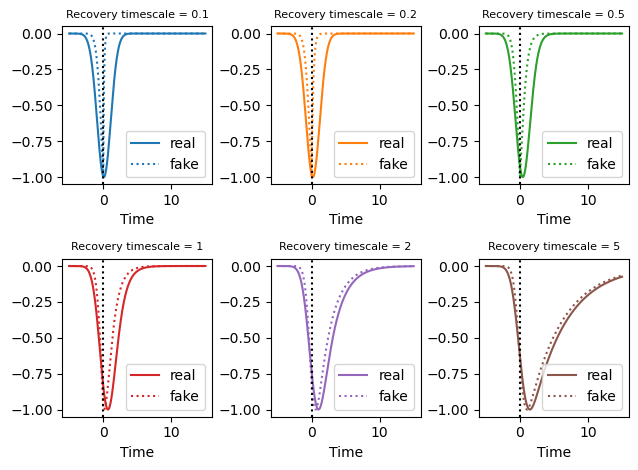

In [6]:
sigma = 1

x = np.arange(-5, 15, 0.01)


fig, axs = plt.subplots(2, 3)

taus = [0.1, 0.2, 0.5, 1, 2, 5]
colors = [f'C{i}' for i in range(len(taus))]

for tau, color, ax in zip(taus, colors, axs.ravel()):

    y = tdep(x, t0=0, decay=1e-6, A=1.5, R1=1.0, tau1=tau,
            R2=0, tau2=np.inf, C=0,
            sigma=sigma)
    
    
    
    ax.plot(x, y/(-y.min()), '-',  color=color, label='real')
    y2 = R(x, -1, tau, sigma, 0)
    
    ax.plot(x, y2/(-y2.min()), ':', color=color, label='fake')

    ax.legend()

    ax.set_title(f'Recovery timescale = {tau}', fontsize=8)
    ax.set_xlabel('Time')

    ax.axvline(x=0, color='k', linestyle=":")

plt.tight_layout()